# Análisis de Calidad

Análisis de la Calidad de Datos
- Identificación de Valores Faltantes: Usa isnull() y sum() para identificar y contar valores faltantes.
- Inconsistencias en los Datos: Revisa los tipos de datos, valores únicos en columnas categóricas y verifica posibles inconsistencias.
- Tratamiento de Valores Faltantes: Decide cómo manejar los valores faltantes (eliminación, imputación, etc.) y aplica esos métodos.
- Documentar Problemas de Calidad: Anota cualquier problema que encuentres y los pasos tomados para resolverlo.

In [62]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [64]:
#Importar data sets 
cash_request0 = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees0 = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [65]:
# Copia del DataFrame original para evitar modificaciones no deseadas
cash_request = cash_request0.copy()
fees = fees0.copy()

## Unir data sets

In [71]:
# Buscar las columnas en comun
common_columns = set(cash_request.columns).intersection(set(fees.columns))
print(common_columns)

{'status', 'created_at', 'id', 'updated_at'}


In [73]:
# Merge left-join id
merged_df_left = pd.merge(fees, cash_request, on = 'id', how = 'left')
merged_df_left.head()

,id,cash_request_id,type,status_x,category,total_amount,reason,created_at_x,updated_at_x,paid_at,...,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,...,2020-07-04 16:38:52.657547+00,NaN,2020-08-05 22:00:00+00,2020-07-07,2020-08-04 22:00:00+00,regular,NaN,NaN,NaN,NaN
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,...,2020-07-08 13:45:03.327043+00,NaN,2020-08-04 23:51:00+00,2020-07-10,2020-12-01 05:59:29.957802+00,regular,NaN,completed,2020-08-15 22:48:56.581966+00,2020-12-01 05:59:29.975858+00
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,...,2020-09-16 07:53:30.307123+00,NaN,2020-10-03 10:00:00+00,2020-09-17,2020-10-06 22:00:00+00,instant,2020-09-22 19:05:39.221698+00,NaN,NaN,NaN
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,...,NaN,NaN,2020-11-30 11:00:00+00,2020-10-14,2020-11-25 17:27:56.467388+00,instant,2020-10-13 08:16:15.684807+00,NaN,NaN,NaN
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,...,2020-08-07 10:02:38.990829+00,NaN,2020-10-05 10:00:00+00,2020-08-12,2020-10-06 22:00:00+00,instant,2020-08-13 22:46:50.68131+00,completed,2020-09-18 23:09:22.056736+00,2020-09-21 12:56:35.649744+00


## Buscar Duplicados en los sets

In [76]:
# Check for duplicate rows in dataframe - none found
cash_request.loc[cash_request.duplicated()]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update


In [146]:
#Check for duplicated user_id

cash_request.loc[cash_request.duplicated(subset = ['id'])]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update


## Veces que salen los "Reason" en fees

(-0.5, 399.5, 199.5, -0.5)

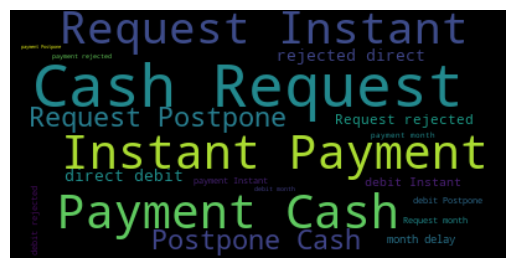

In [138]:
wordcloud2 = WordCloud().generate(' '.join(fees['reason']))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

## Valores NaN

In [84]:
merged_df_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          21061 non-null  int64  
 1   cash_request_id             21057 non-null  float64
 2   type                        21061 non-null  object 
 3   status_x                    21061 non-null  object 
 4   category                    2196 non-null   object 
 5   total_amount                21061 non-null  float64
 6   reason                      21061 non-null  object 
 7   created_at_x                21061 non-null  object 
 8   updated_at_x                21061 non-null  object 
 9   paid_at                     15531 non-null  object 
 10  from_date                   7766 non-null   object 
 11  to_date                     7766 non-null   object 
 12  charge_moment               21061 non-null  object 
 13  amount                      184

In [86]:
missing_values = pd.isnull(merged_df_left)

In [88]:
# Count missing values in each column
missing_counts = missing_values.sum()

In [90]:
# Count columns with missing values
columns_with_missing = missing_counts[missing_counts > 0].count()

In [92]:
# Check if all columns have missing values
all_columns_missing = missing_counts.all()

In [94]:
# Calculate the total number of missing values
total_missing_values = missing_counts.sum()

In [96]:
# Display the results
print("Missing Values in Each Column:\n", missing_counts)
print("\nNumber of Columns with Missing Values:", columns_with_missing)
print("All Columns Have Missing Values:", all_columns_missing)
print("\nTotal Missing Values in the DataFrame:", total_missing_values)

Missing Values in Each Column:
 id                                0
cash_request_id                   4
type                              0
status_x                          0
category                      18865
total_amount                      0
reason                            0
created_at_x                      0
updated_at_x                      0
paid_at                        5530
from_date                     13295
to_date                       13295
charge_moment                     0
amount                         2628
status_y                       2628
created_at_y                   2628
updated_at_y                   2628
user_id                        4601
moderated_at                   5499
deleted_account_id            19087
reimbursement_date             2628
cash_request_received_date     9439
money_back_date                9595
transfer_type                  2628
send_at                        9853
recovery_status               18675
reco_creation                 18

In [98]:
percent_missing = merged_df_left.isnull().sum() * 100 / len(merged_df_left)
missing_value_df = pd.DataFrame({'column_name': merged_df_left.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
id,id,0.000000
cash_request_id,cash_request_id,0.018992
type,type,0.000000
status_x,status_x,0.000000
category,category,89.573145
total_amount,total_amount,0.000000
reason,reason,0.000000
created_at_x,created_at_x,0.000000
updated_at_x,updated_at_x,0.000000
paid_at,paid_at,26.257063


In [136]:
#Miramos cuántos NaN hay tanto en deleted_account_id como en cash_request_id
filas_nan_cash = merged_df_left[merged_df_left['cash_request_id'].isnull()]
filas_nan_deleted = merged_df_left[merged_df_left['deleted_account_id'].isnull()]

print(filas_nan_cash)
print(filas_nan_deleted)

         id  cash_request_id             type   status_x category  \
1911   2990              NaN  instant_payment  cancelled      NaN   
1960   3124              NaN  instant_payment  cancelled      NaN   
4605   5185              NaN  instant_payment  cancelled      NaN   
11870  3590              NaN  instant_payment  cancelled      NaN   

       total_amount                              reason  \
1911            5.0  Instant Payment Cash Request 11164   
1960            5.0  Instant Payment Cash Request 11444   
4605            5.0  Instant Payment Cash Request 11788   
11870           5.0  Instant Payment Cash Request 12212   

                        created_at_x                   updated_at_x paid_at  \
1911   2020-08-06 22:42:34.525373+00  2020-11-04 16:01:17.296048+00     NaN   
1960   2020-08-08 06:33:06.244651+00  2020-11-04 16:01:08.332978+00     NaN   
4605   2020-08-26 09:39:37.362933+00  2020-11-04 16:01:36.492576+00     NaN   
11870  2020-08-12 14:20:06.657075+00  2020

In [144]:
#Eliminamos los 4 NAN que aparecían en Cash_request_id pues no tienen relevancia al ser más de 23.000 muestras
merged_df_left_limpo = merged_df_left.dropna(subset=['cash_request_id'])
print("DataFrame sin NaN en 'cash_request_id':")
print(merged_df_left_limpo)

DataFrame sin NaN en 'cash_request_id':
          id  cash_request_id             type  status_x  \
0       6537          14941.0  instant_payment  rejected   
1       6961          11714.0         incident  accepted   
2      16296          23371.0  instant_payment  accepted   
3      20775          26772.0  instant_payment  accepted   
4      11242          19350.0  instant_payment  accepted   
...      ...              ...              ...       ...   
21056  12372          20262.0  instant_payment  rejected   
21057  20768          26764.0  instant_payment  rejected   
21058  18779          25331.0  instant_payment  rejected   
21059  16542          23628.0  instant_payment  rejected   
21060  13301          20982.0  instant_payment  accepted   

                    category  total_amount  \
0                        NaN           5.0   
1      rejected_direct_debit           5.0   
2                        NaN           5.0   
3                        NaN           5.0   
4        